In [ ]:
pip install ultralytics

In [ ]:
pip install clearml

In [3]:
import zipfile
import os
from ultralytics import YOLO
from clearml import Task, Logger

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
zip_data = '/content/drive/MyDrive/CV_Course/Dataset_for_YOLO.zip'
z = zipfile.ZipFile(zip_data, 'r')
z.extractall()
print(os.listdir())

['.config', 'drive', 'Dataset_for_YOLO', 'sample_data']


In [ ]:
!clearml-init

#api {
#  # Crew_11_CV
#  web_server: https://app.clear.ml
#  api_server: https://api.clear.ml
#  files_server: https://files.clear.ml
#  credentials {
#    "access_key" = "YSVL8SDTOQS7L07QP0C0"
#    "secret_key" = "t6U3BZtEtlnipwuCcAwuzekLgpPxYcuwqLnuyOSaFWJfQjZumT"
#  }
#}

ClearML Task: created new task id=9b6829f3ae5b48d5af484362af29d1e9
ClearML results page: https://app.clear.ml/projects/ad34b5d2036d44e7a0d10c6189ee8a59/experiments/9b6829f3ae5b48d5af484362af29d1e9/output/log


Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=15, patience=50, batch=50, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

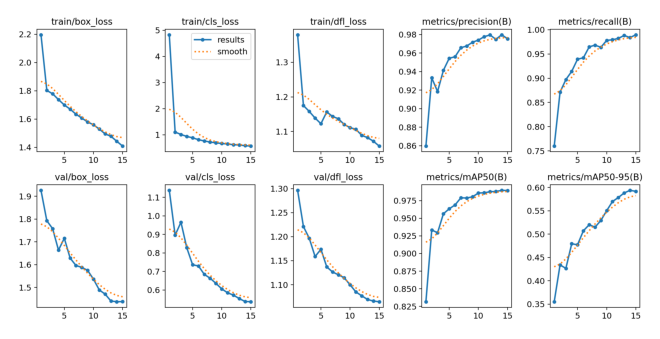

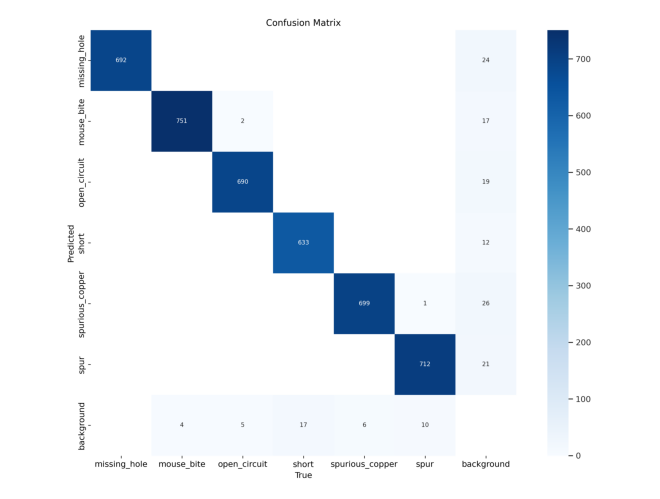

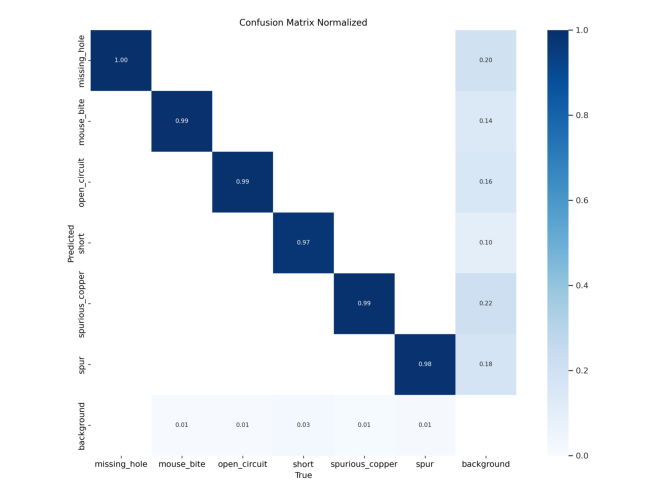

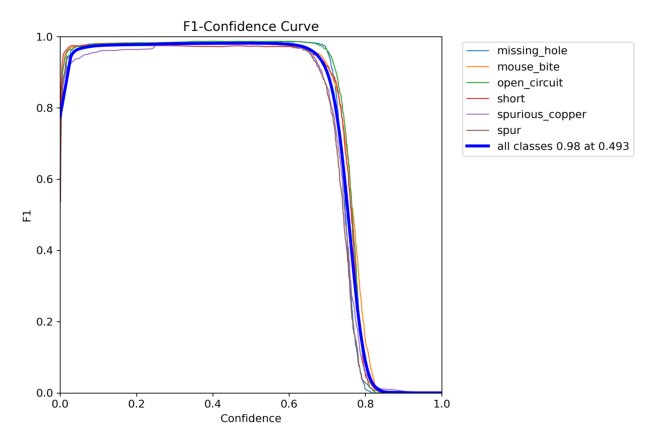

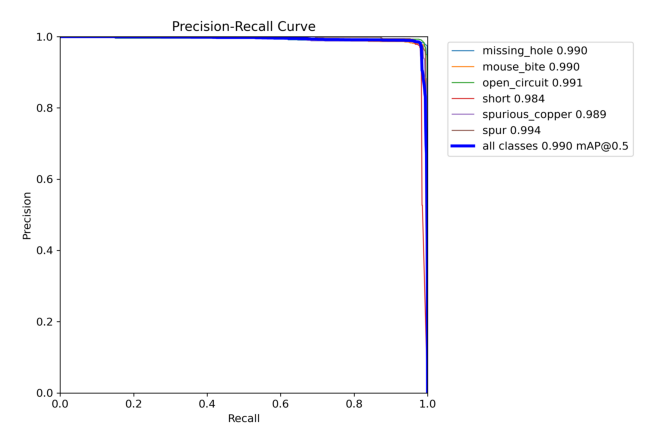

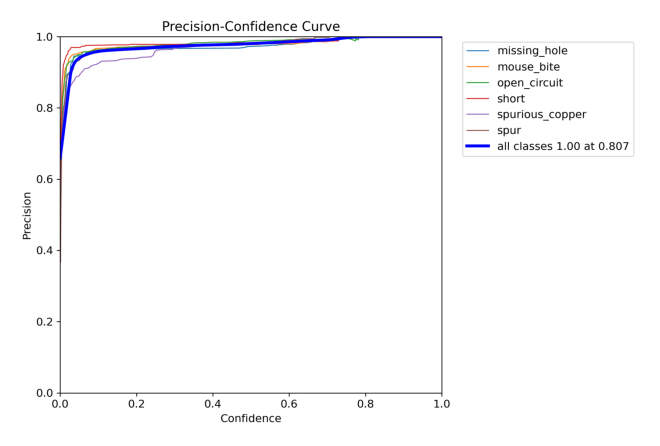

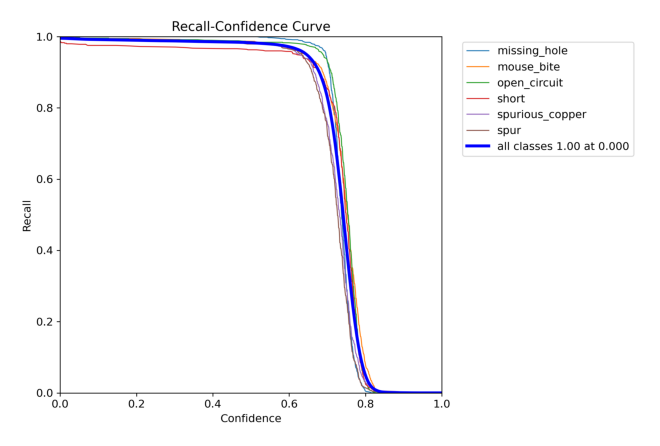

In [11]:
#model = YOLO('yolov8s.pt')
task = Task.init(project_name="Variant0.1", task_name="YOLOv8_training_0.2")
imgsz = 640
epochs = 15
batch = 50
name = 'YOLOv8s'

# Load a model
model_variant = "yolov8s"
# Log "model_variant" parameter to task
task.set_parameter("model_variant", model_variant)
args = dict(data='/content/data.yaml',
            epochs=epochs,
            imgsz=imgsz,
            batch=batch)
# Load the YOLOv8 model
model = YOLO(f'{model_variant}.pt')

task.connect(args)

# Train the model
# If running remotely, the arguments may be overridden by ClearML if they were changed in the UI
results = model.train(**args)

In [12]:
task.close()

In [13]:
model = YOLO("runs/detect/train3/weights/best.pt")

In [ ]:
# pre = model.predict(
#    source="Dataset_for_YOLO/val/images",
#    show=True,
#    imgsz=608,
#    hide_labels=True,
#    save=True,
#    name="val_pred",
#    conf=0.1,
#    )